## Activity-5: Machine Learning

#### Name/Surname: Onur Kaplan
#### Dataset Name:Cryotherapy Dataset Data Set, NBA Players Stats - 2014-2015, FIFA Season 17-18 Data Visualisation | Clustering | Machine Learning
#### Dataset url:https://archive.ics.uci.edu/ml/datasets/Cryotherapy+Dataset+ , https://www.kaggle.com/drgilermo/nba-players-stats-20142015 , https://www.kaggle.com/oliversinn/fifa-18-visualisation-clustering-ml/data 

#### Part-1: Regression

In [12]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 16 14:32:34 2020

@author: Onur
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

veriler = pd.read_csv('players_stats.csv')

pos = veriler.iloc[:,30:31]
fill = veriler[['Age','Height','Weight','BMI']]
pts = veriler.iloc[:,3:4]
data1 = veriler.iloc[:,1:3]
data2 = veriler.iloc[:,4:24]


from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(pos)
pos = imputer.transform(pos)

numeric = SimpleImputer(missing_values=np.nan, strategy='mean')
numeric = numeric.fit(fill)
fill = numeric.transform(fill)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pos = le.fit_transform(pos)

fill = pd.DataFrame(fill)
pos = pd.DataFrame(pos)

fill.columns = ["Age", "Height", "Weight", "BMI"]
pos.columns = ["Pos"]

lastdataCorr = pd.concat([data1,data2,fill,pos,pts],axis=1)
corr_matrix = lastdataCorr.corr()
print(corr_matrix)

last_data = pd.concat([data1,data2,fill,pos],axis=1)

last_data = last_data.values
pts = pts.values

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(last_data,pts,test_size=0.33, random_state=0)

from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)

tahmin = linear.predict(x_test)

from sklearn.metrics import r2_score
print('R2 Lineer : ',r2_score(y_test,tahmin))

from sklearn.preprocessing import PolynomialFeatures
Polynomial =  PolynomialFeatures(degree=2)
x_poly = Polynomial.fit_transform(x_train)
lineerPoly = LinearRegression()
lineerPoly.fit(x_poly,y_train)
tahminPoly = lineerPoly.predict(Polynomial.fit_transform(x_test))
print('R2 Polynomial : ',r2_score(y_test,tahminPoly))

from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor(n_estimators=10,random_state=0)
RandomForest.fit(x_train,y_train) 
tahminRandomF = RandomForest.predict(x_test)
print('R2 RandomForest:',r2_score(y_test,tahminRandomF))



              Games Played       MIN       FGM       FGA       FG%       3PM  \
Games Played      1.000000  0.872959  0.739667  0.741407  0.369492  0.492036   
MIN               0.872959  1.000000  0.924123  0.926747  0.304910  0.601725   
FGM               0.739667  0.924123  1.000000  0.986789  0.310255  0.548751   
FGA               0.741407  0.926747  0.986789  1.000000  0.231871  0.624375   
FG%               0.369492  0.304910  0.310255  0.231871  1.000000 -0.045385   
3PM               0.492036  0.601725  0.548751  0.624375 -0.045385  1.000000   
3PA               0.510728  0.618675  0.560697  0.646638 -0.070072  0.988563   
3P%               0.218361  0.278590  0.254783  0.309729 -0.097218  0.537028   
FTM               0.575342  0.775022  0.868013  0.865389  0.235433  0.443760   
FTA               0.602332  0.794161  0.872212  0.856496  0.286115  0.379603   
FT%               0.341861  0.322838  0.315404  0.345325  0.220422  0.358969   
OREB              0.527621  0.557974  0.

#### Part-2: Classification

In [10]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 16 16:42:09 2020

@author: Onur
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import  confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

veriler = pd.read_csv('Cryotherapy.csv')

x = veriler.iloc[:,0:6]
y = veriler.iloc[:,6:7]

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn.fit(X_train,y_train)

tahminKNN = knn.predict(X_test)
print('KNN confusion_matrix \n : ', confusion_matrix(y_test,tahminKNN))
print('KNN classification_report \n :',classification_report(y_test,tahminKNN)) 
print('KNN accuracy_score \n :', accuracy_score(y_test,tahminKNN))
print("------------------------------------------------------------------------ \n")

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

tahminGNB = gnb.predict(X_test)
print('GNB confusion_matrix \n : ', confusion_matrix(y_test,tahminGNB))
print('GNB classification_report \n :',classification_report(y_test,tahminGNB)) 
print('GNB accuracy_score \n :', accuracy_score(y_test,tahminGNB))
print("------------------------------------------------------------------------ \n")

from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

tahminSVC = svc.predict(X_test)
print('SVC confusion_matrix \n : ', confusion_matrix(y_test,tahminSVC))
print('SVC classification_report \n :',classification_report(y_test,tahminSVC)) 
print('SVC accuracy_score \n :', accuracy_score(y_test,tahminSVC))
print("------------------------------------------------------------------------ \n")

KNN confusion_matrix 
 :  [[ 8  3]
 [ 0 19]]
KNN classification_report 
 :               precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.86      1.00      0.93        19

    accuracy                           0.90        30
   macro avg       0.93      0.86      0.88        30
weighted avg       0.91      0.90      0.90        30

KNN accuracy_score 
 : 0.9
------------------------------------------------------------------------ 

GNB confusion_matrix 
 :  [[ 9  2]
 [ 4 15]]
GNB classification_report 
 :               precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.88      0.79      0.83        19

    accuracy                           0.80        30
   macro avg       0.79      0.80      0.79        30
weighted avg       0.81      0.80      0.80        30

GNB accuracy_score 
 : 0.8
-------------------------------------------------------------------

#### Part-3: Clustering

tahminAgg :  [2 0 0 ... 1 1 1]
tahminKMeans :  [3 1 4 ... 2 2 2]
Kümelerin orta noktası : [[6.10970467e+01 5.70405500e+01 5.85828749e+01 6.08968718e+01
  6.03559727e+01 2.08464326e+05 6.10970467e+01 5.86477355e+01
  5.70405500e+01 6.03559727e+01 5.85828749e+01 6.08968718e+01
  6.19645235e+01 6.00104941e+01 6.12389341e+01 5.94591783e+01
  6.10970467e+01 5.86477355e+01 5.70405500e+01 6.03559727e+01
  5.85828749e+01 6.08968718e+01 6.19645235e+01 6.00104941e+01
  6.12389341e+01 5.94591783e+01 6.00104941e+01]
 [6.19616294e+01 6.03363118e+01 6.14640762e+01 6.15436568e+01
  6.22928911e+01 1.52246644e+05 6.19616294e+01 6.03527452e+01
  6.03363118e+01 6.22928911e+01 6.14640762e+01 6.15436568e+01
  6.22345414e+01 6.10330432e+01 6.14595147e+01 6.09509362e+01
  6.19616294e+01 6.03527452e+01 6.03363118e+01 6.22928911e+01
  6.14640762e+01 6.15436568e+01 6.22345414e+01 6.10330432e+01
  6.14595147e+01 6.09509362e+01 6.10330432e+01]
 [5.60161285e+01 5.18174247e+01 5.29519393e+01 5.58710682e+01
  5.4772

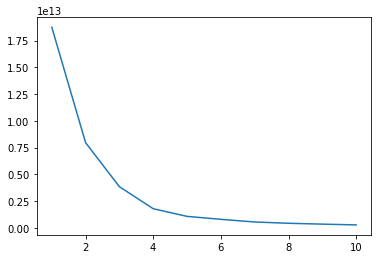

In [11]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 16 17:25:22 2020

@author: Onur
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

veriler = pd.read_csv('PlayerPlayingPositionData.csv')


last_data = veriler[veriler.columns.difference(['Preferred Positions'])]
last_data.drop('Unnamed: 0', axis=1, inplace=True)

from sklearn.impute import SimpleImputer 
numeric = SimpleImputer(missing_values=np.nan, strategy='mean')
numeric = numeric.fit(last_data)
last_data = numeric.transform(last_data)

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
tahminAgg = ac.fit_predict(last_data)
print("tahminAgg : ",tahminAgg)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,init = 'k-means++')
kmeans.fit(last_data)
tahminKMeans = kmeans.predict(last_data)
print("tahminKMeans : ",tahminKMeans)

print("Kümelerin orta noktası :",kmeans.cluster_centers_)

sonuclar = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i,init='k-means++',random_state=123)
    kmeans.fit(last_data)
    sonuclar.append(kmeans.inertia_)

plt.plot(range(1,11),sonuclar)